# <font size="6"><center>FORBES HIGH PAID ATHLETES 1990-2021 DATA ANALYSIS

![](https://www.glusea.com/wp-content/uploads/2021/06/highest-paid.jpg?compress=true&quality=80&w=500&dpr=1.4)

Since 1990 Forbes has tracked the highest-earning athletes in the world. For each year (except 2001 when they switched the time period for which the data was tallied), the magazine has listed between 40 or so and 100 athletes earning the most in salary and endorsements.

# TABLE OF CONTENTS

## 1. Reading the Dataset.
This chapter presents the steps to read the dataset about IPL matches.

## 2. Data Preparation: Cleaning and Formatting.
In all data-analysis projects, the data preparation step is not only necessary but also vital to find and handle features that could cause some problems while making the quantitative analysis, or that could lead to low efficient coding. According to Alivia Smith, this step usually takes up to 80% of the entire time of a data analysis project. Therefore, missing, invalid, and inconsistent values have been addressed. Finally, this step presents a code for changing the format of column names.

## 3. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).
Although in many cases, the exploratory data analysis and the quantitative and qualitative analysis are separated steps, in this specific project, they have been joined. This step, previous to asking questions that could lead to reaching the project's aim, presents global-useful information about the different columns of the dataset. Some initial examinations were performed as a way of beginning finding patterns, creating hypotheses, and corroborating early assumptions. Later, deeper investigations were depicted as part of reaching the project's goal.

### Analysis covered: 
Total earnings of all athletes per year

### Asking and Answering Questions:
1. Which Athletes has the highest Earning value?
2. Which Sport has the highest Earning value?

## 4. Inferences and Conclusions.
Although all conclusions and answers are exposed in the previous section accordingly to each question, this section also presents, in a concise manner, the most significant insights.

# 1. READING THE DATASET
We're going to begin by importing all the packages we'll use in this project.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load CSV file into Dataframe and take a overview 
df = pd.read_csv('forbesathletesv2.csv')

Because the file is a comma-separated value (CSV) file, we use the pandas function pd.read_csv() to open and read the file.

# 2. DATA TREATMENT: CLEANING AND FORMATTING

In [3]:
df.head()

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball


In [4]:
type(df)

pandas.core.frame.DataFrame

We have verified that the file has been created as a DataFrame variable. And we can see the first five rows of the dataset as a preview.

In [5]:
print('The dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset contains 1659 rows and 4 columns


Now, let's see some additional information.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1659 non-null   object 
 1   Earnings  1659 non-null   float64
 2   Year      1659 non-null   int64  
 3   Sport     1659 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 52.0+ KB


In [7]:
df.describe()

,Earnings,Year
count,1659.000000,1659.000000
mean,27.523810,2009.338156
std,20.334179,9.374635
min,3.800000,1990.000000
25%,17.750000,2002.000000
50%,24.000000,2013.000000
75%,32.000000,2017.000000
max,300.000000,2021.000000


In [8]:
df.Sport.unique()

array(['Mixed Martial Arts', 'Soccer', 'Football', 'Basketball', 'Tennis',
       'Racing', 'Golf', 'Boxing', 'Baseball', 'Cricket', 'Track', 'MMA',
       'Cycling', 'Hockey', 'Football/Baseball'], dtype=object)

## Working with missing, incorrect, and invalid data
Let's check the NaN values within the entire data frame. We will see a list of columns sorted according to the number of NaN values that they present.

In [9]:
df.isnull().sum()

Name        0
Earnings    0
Year        0
Sport       0
dtype: int64

Here we can see there is no NAN value, so the data is ready for visualization.

# 3.Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).

To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are. In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works.

In [10]:
df.sample(5)

,Name,Earnings,Year,Sport
523,Andy Murray,23.0,2016,Tennis
142,Andre Drummond,22.6,2020,Basketball
1367,Ken Griffey Jr,13.0,1997,Baseball
1252,Arnold Palmer,17.0,2002,Golf
98,Mesut Ozil,28.7,2020,Soccer


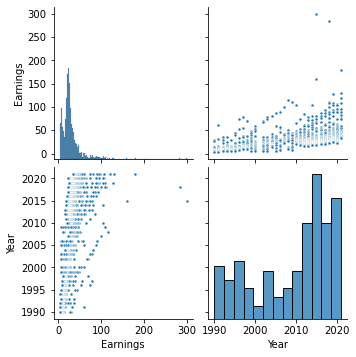

In [11]:
sns.pairplot(df, markers = '.');

## Total earnings of all athletes per year

In [12]:
# group Earnings by Year
total_income_per_year = df.groupby('Year')['Earnings'].sum().sort_values(ascending=False)
total_income_per_year.head()

Year
2019    3998.9
2018    3814.9
2020    3622.3
2015    3218.7
2016    3152.4
Name: Earnings, dtype: float64

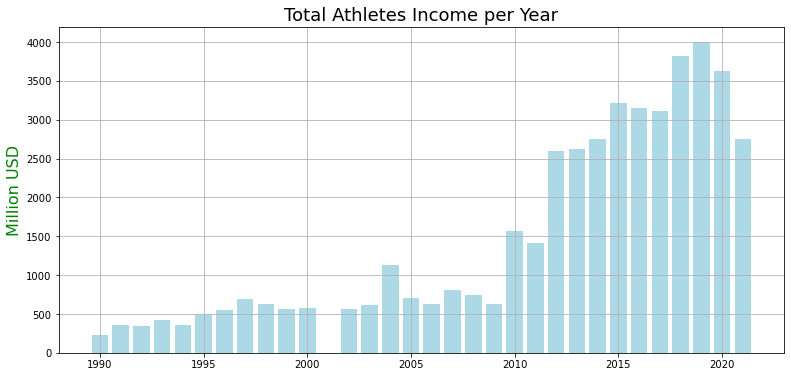

In [13]:
#Create a visualization of the data
plt.figure(figsize=(13,6))
plt.bar(total_income_per_year.index,total_income_per_year, color='lightblue')

plt.title('Total Athletes Income per Year', fontsize=18);
plt.ylabel('Million USD', fontsize=16, color='green');
plt.grid()

The Year has highest total athletes earning value is:

2019 (3998.9) then 2018 (3814.9) and 2020 (3622.3)

# Asking and Answering Questions:

## Which Athletes has the highest Earning value?

In [14]:
name_group = df.groupby('Name') #Count the total earnings of every athlete
total_earning = [i for i in name_group['Earnings'].sum()]

names = df.Name.unique() #Create a list of names
names.sort() #Sort it to make it corresponds to the total_earning list

all_data = {'Name':names, 'TotalEarnings':total_earning}

In [15]:
#Create new data frame
df2 = pd.DataFrame(all_data)
df2.sort_values('TotalEarnings', ascending=False, inplace=True)
df2.head()

,Name,TotalEarnings
494,Tiger Woods,1632.2
182,Floyd Mayweather,944.5
108,Cristiano Ronaldo,942.9
449,Roger Federer,933.1
327,Lionel Messi,911.5


In [16]:
#Create new variables for another plot
top10_names = df2['Name'].head(10)
top10_TEs = df2['TotalEarnings'].head(10)

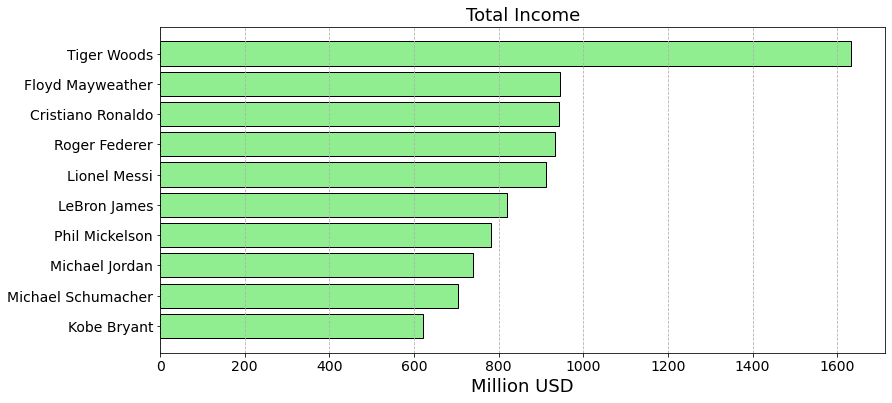

In [17]:
plt.figure(figsize=(13,6))
plt.barh(top10_names, top10_TEs, edgecolor='black', color='lightgreen')

plt.title('Total Income', fontsize=18)
plt.xlabel('Million USD', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.grid(linestyle='--', axis='x')
plt.gca().invert_yaxis()

The Athletes with highest Earning value:
* Tiger Woods 1632.
* Floyd Mayweather 944.5
* Cristiano Ronaldo 942.9

## Which Sport has the highest Earning value?

In [18]:
# group Earnings by Sport 
total_earning_by_sport =df.groupby('Sport')['Earnings'].sum().sort_values(ascending=False)
total_earning_by_sport.head()

Sport
Basketball    11574.8
Football       7209.9
Baseball       5818.1
Soccer         5402.8
Golf           3917.3
Name: Earnings, dtype: float64

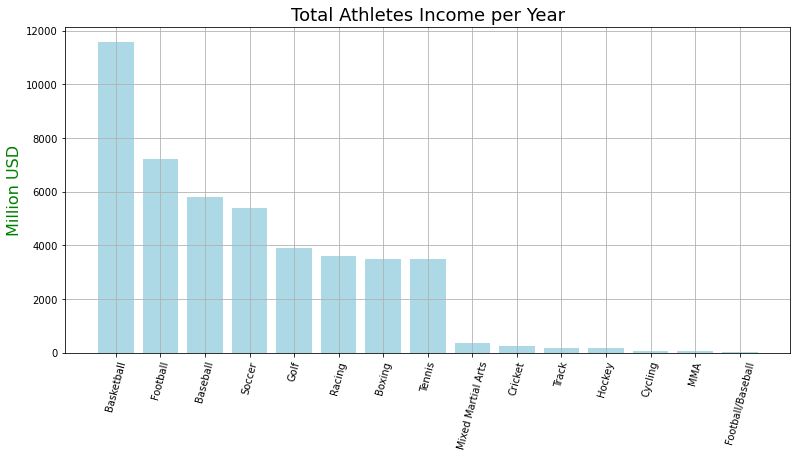

In [19]:
#Create a visualization of the data
plt.figure(figsize=(13,6))
plt.bar(total_earning_by_sport.index,total_earning_by_sport, color='lightblue')
plt.xticks(rotation=75)
plt.title('Total Athletes Income per Year', fontsize=18);
plt.ylabel('Million USD', fontsize=16, color='green');
plt.grid()

The sports has the highest earning values is:
* Basketball (11544.0) then Football (7209.9) and Baseball (5818.1).

# Inferences and Conclusion

These are the few conclusions that I can draw from the above analysis.

* The Year has highest total athletes earning value is: **2019 (3998.9)** then **2018 (3814.9)** and **2020 (3622.3)**.
* The sports has the highest earning values is: **Basketball (11544.0)** then **Football (7209.9)** and **Baseball (5818.1)**.
* The Athletes wuth highest Earning value: **Tiger Woods (1632.2)** then **Floyd Mayweather (944.5)** then **Cristiano Ronaldo (942.9)**.